### **KNN**

In [ ]:
import math

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd


stocks_data = pd.read_excel(f'/content/drive/MyDrive/Colab Notebooks/top200.xls')
stocks_data = stocks_data.drop(columns=['證券代碼'])
strategy_money=[]
#Data Years
for k in range(12):
    start_money = 200*10000
    current_stock = []
    for i in range(200):
        current_stock.append(0)
    current_money = start_money
    data_years = stocks_data['年月'].unique()
    train_years = k+1
    train_data = stocks_data[stocks_data['年月'].isin(data_years[:train_years])]
    train_data_label = train_data['ReturnMean_year_Label']
    train_data = train_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])

    test_data = stocks_data[stocks_data['年月'].isin(data_years[train_years:])]
    test_data_label = test_data['ReturnMean_year_Label']
    test_data = test_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])
    #Data Min-Max Normalization
    for col in stocks_data.columns[2:-2]:
        stocks_data[col] = (stocks_data[col]-stocks_data[col].min())/(stocks_data[col].max()-stocks_data[col].min())
    #計算相關係數，取絕對值後排序
    stocks_data.corr()['Return'].abs().sort_values(ascending=False)
    knn = KNeighborsClassifier()
    knn.fit(train_data,train_data_label)
    predict_data = knn.predict(test_data)
    for pre_times in range(13-train_years):
        tmp = 0
        tmp_stock = []
        for i in range(200):
            if predict_data[pre_times*200+i] == -1:
                current_money += stocks_data["收盤價(元)_年"][(train_years+pre_times)*200+i]*current_stock[i]
                current_stock[i] = 0
                # sell
            if predict_data[pre_times*200+i] == 1:
                tmp += 1
                tmp_stock.append(i)
                # 紀錄要買哪隻和每隻要分多少錢下去
        if tmp:
            per_money = current_money / tmp
            for j in tmp_stock:
                if stocks_data["收盤價(元)_年"][(train_years+pre_times)*200+j] != 0:
                    current_stock[j] += per_money / stocks_data["收盤價(元)_年"][(train_years+pre_times)*200+j]
                # 買入
            current_money = 0

    #折現
    for i in range(len(current_stock)):
        current_money += current_stock[i]*stocks_data["收盤價(元)_年"][12*200+i]
    strategy_money.append(math.floor(current_money))
print(strategy_money)
# 報酬率
ROI = []
ROI_year = []
for i in range(len(strategy_money)-1):
    ROI.append((strategy_money[i]-start_money)/start_money)
# 年化報酬率
for i in range(len(ROI)):
    ROI_year.append(((ROI[i]+1)**(1/(12-i))-1)*100)
print(ROI)
plt.figure()
plt.xlabel("train_time(year)")
plt.ylabel("test data with strategy ROI(%)")
plt.plot(ROI)
print(ROI_year)
plt.figure()
plt.plot(ROI_year)
plt.xlabel("train_time(year)")
plt.ylabel("test data with strategy irr(%)")
plt.show()

### **隨機森林**

In [ ]:
import datetime
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
stocks_data = pd.read_excel(f'/content/drive/MyDrive/Colab Notebooks/top200.xls')
stocks_data = stocks_data.drop(columns=['證券代碼'])
stocks_data

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

stocks_data = pd.read_excel(f'/content/drive/MyDrive/Colab Notebooks/top200.xls')
stocks_data = stocks_data.drop(columns=['證券代碼'])
strategy_money=[]
for k in range(12):
    start_money = 200*10000
    current_stock = []
    for i in range(200):
        current_stock.append(0)
    current_money = start_money
    data_years = stocks_data['年月'].unique()
    train_years = k+1
    train_data = stocks_data[stocks_data['年月'].isin(data_years[:train_years])]
    train_data_label = train_data['ReturnMean_year_Label']
    train_data = train_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])

    test_data = stocks_data[stocks_data['年月'].isin(data_years[train_years:])]
    test_data_label = test_data['ReturnMean_year_Label']
    test_data = test_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])
    #Data Min-Max Normalization
    for col in stocks_data.columns[2:-2]:
        stocks_data[col] = (stocks_data[col]-stocks_data[col].min())/(stocks_data[col].max()-stocks_data[col].min())
    #計算相關係數，取絕對值後排序
    stocks_data.corr()['Return'].abs().sort_values(ascending=False)
    forest = RandomForestClassifier(criterion='gini', n_estimators=10, random_state=3, n_jobs=2)
    forest.fit(train_data, train_data_label)

    label_predicted = forest.predict(test_data)
    for pre_times in range(13-train_years):
        tmp = 0
        tmp_stock = []
        for i in range(200):
            if label_predicted[pre_times*200+i] == -1:
                current_money += stocks_data["收盤價(元)_年"][(train_years+pre_times)*200+i]*current_stock[i]
                current_stock[i] = 0
                # sell
            if label_predicted[pre_times*200+i] == 1:
                tmp += 1
                tmp_stock.append(i)
                # 紀錄要買哪隻和每隻要分多少錢下去
        if tmp:
            per_money = current_money / tmp
            for j in tmp_stock:
                if stocks_data["收盤價(元)_年"][(train_years+pre_times)*200+j] != 0:
                    current_stock[j] += per_money / stocks_data["收盤價(元)_年"][(train_years+pre_times)*200+j]
                # 買入
            current_money = 0

    #折現
    for i in range(len(current_stock)):
      current_money += current_stock[i]*stocks_data["收盤價(元)_年"][12*200+i]
    strategy_money.append(math.floor(current_money))
print(strategy_money)

# 報酬率
ROI = []
ROI_year= []
for i in range(len(strategy_money)-1):
    ROI.append((strategy_money[i]-start_money)/start_money)
# 年化報酬率ROI_year = []
for i in range(len(ROI)):
    ROI_year.append(((ROI[i]+1)**(1/(12-i))-1)*100)
print(ROI)
plt.figure()
plt.xlabel("train_time(year)")
plt.ylabel("test data with strategy ROI(%)")
plt.plot(ROI)
print(ROI_year)
plt.figure()
plt.plot(ROI_year)
plt.xlabel("train_time(year)")
plt.ylabel("test data with strategy irr(%)")
plt.show()

In [ ]:
for k in range(12):
    data_years = stocks_data['年月'].unique()
    train_years = k+1
    train_data = stocks_data[stocks_data['年月'].isin(data_years[:train_years])]
    train_data_label = train_data['ReturnMean_year_Label']
    train_data = train_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])

    test_data = stocks_data[stocks_data['年月'].isin(data_years[train_years:])]
    test_data_label = test_data['ReturnMean_year_Label']
    test_data = test_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])
    #Data Min-Max Normalization
    for col in stocks_data.columns[2:-2]:
      stocks_data[col] = (stocks_data[col]-stocks_data[col].min())/(stocks_data[col].max()-stocks_data[col].min())


    #計算相關係數，取絕對值後排序
    stocks_data.corr()['Return'].abs().sort_values(ascending=False)

    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(criterion='gini', n_estimators=200, random_state=3, n_jobs=2)
    forest.fit(train_data, train_data_label)

    # 以test data來檢測預測結果
    label_predicted = forest.predict(test_data)

    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(test_data_label, label_predicted, labels=[1, -1])
    #水平為預測
    #垂直為現實
    accuracy = (cm[0][0]+cm[1][1])/len(test_data_label)
    print(f'TV{k} accuracy: {accuracy}')

TV0 accuracy: 0.53125
TV1 accuracy: 0.5372727272727272
TV2 accuracy: 0.579
TV3 accuracy: 0.57
TV4 accuracy: 0.604375
TV5 accuracy: 0.6142857142857143
TV6 accuracy: 0.6241666666666666
TV7 accuracy: 0.642
TV8 accuracy: 0.66125
TV9 accuracy: 0.6666666666666666
TV10 accuracy: 0.705
TV11 accuracy: 0.925


### **K-means**

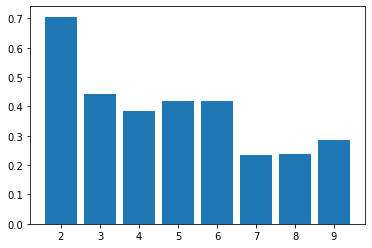

[0.7060195322090309, 0.44266924277896996, 0.3852664919503606, 0.4186668181929504, 0.4196143709106678, 0.2350589253482878, 0.23686899495085015, 0.28637334604254444]


In [ ]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt
silhouette_avgs = []
ks = range(2, 10)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(train_data)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(train_data, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

[26132224, 569787, 26438223, 13804249, 2000000, 2000000, 2000000, 2000000, 2000000, 1782891, 16005493, 2000000]
[12.066112, -0.7151065, 12.2191115, 5.9021245, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1085545, 7.0027465]
[23.883138114687718, -10.787504980988349, 29.455416576993798, 23.94251654255697, 0.0, 0.0, 0.0, 0.0, 0.0, -3.757935100678267, 182.89126002759434]


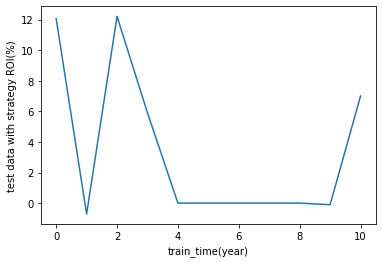

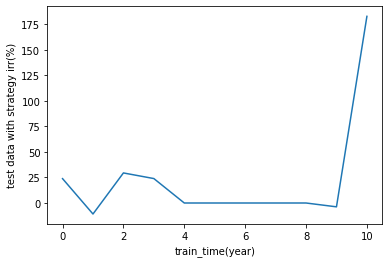

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

stocks_data = pd.read_excel(f'/content/drive/MyDrive/Colab Notebooks/top200.xls')
stocks_data = stocks_data.drop(columns=['證券代碼'])
strategy_money=[]
for k in range(12):
    start_money = 200*10000
    current_stock = []
    for i in range(200):
        current_stock.append(0)
    current_money = start_money
    data_years = stocks_data['年月'].unique()
    train_years = k+1
    train_data = stocks_data[stocks_data['年月'].isin(data_years[:train_years])]
    train_data_label = train_data['ReturnMean_year_Label']
    train_data = train_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])

    test_data = stocks_data[stocks_data['年月'].isin(data_years[train_years:])]
    test_data_label = test_data['ReturnMean_year_Label']
    test_data = test_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])
    #Data Min-Max Normalization
    for col in stocks_data.columns[2:-2]:
        stocks_data[col] = (stocks_data[col]-stocks_data[col].min())/(stocks_data[col].max()-stocks_data[col].min())
    #計算相關係數，取絕對值後排序
    stocks_data.corr()['Return'].abs().sort_values(ascending=False)
    kmeans_fit = cluster.KMeans(n_clusters = 2).fit(train_data, train_data_label)
    cluster_labels = kmeans_fit.labels_
    label_predicted = kmeans_fit.predict(test_data)
    for pre_times in range(13-train_years):
        tmp = 0
        tmp_stock = []
        for i in range(200):
            if label_predicted[pre_times*200+i] == -1:
                current_money += stocks_data["收盤價(元)_年"][(train_years+pre_times)*200+i]*current_stock[i]
                current_stock[i] = 0
                # sell
            if label_predicted[pre_times*200+i] == 1:
                tmp += 1
                tmp_stock.append(i)
                # 紀錄要買哪隻和每隻要分多少錢下去
        if tmp:
            per_money = current_money / tmp
            for j in tmp_stock:
                if stocks_data["收盤價(元)_年"][(train_years+pre_times)*200+j] != 0:
                    current_stock[j] += per_money / stocks_data["收盤價(元)_年"][(train_years+pre_times)*200+j]
                # 買入
            current_money = 0

    #折現
    for i in range(len(current_stock)):
      current_money += current_stock[i]*stocks_data["收盤價(元)_年"][12*200+i]
    strategy_money.append(math.floor(current_money))
print(strategy_money)

# 報酬率
ROI = []
ROI_year= []
for i in range(len(strategy_money)-1):
    ROI.append((strategy_money[i]-start_money)/start_money)
# 年化報酬率ROI_year = []
for i in range(len(ROI)):
    ROI_year.append(((ROI[i]+1)**(1/(12-i))-1)*100)
print(ROI)
plt.figure()
plt.xlabel("train_time(year)")
plt.ylabel("test data with strategy ROI(%)")
plt.plot(ROI)
print(ROI_year)
plt.figure()
plt.plot(ROI_year)
plt.xlabel("train_time(year)")
plt.ylabel("test data with strategy irr(%)")
plt.show()

In [ ]:
for k in range(12):
    data_years = stocks_data['年月'].unique()
    train_years = k+1
    train_data = stocks_data[stocks_data['年月'].isin(data_years[:train_years])]
    train_data_label = train_data['ReturnMean_year_Label']
    train_data = train_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])

    test_data = stocks_data[stocks_data['年月'].isin(data_years[train_years:])]
    test_data_label = test_data['ReturnMean_year_Label']
    test_data = test_data.drop(columns=['簡稱', '年月', 'Return', 'ReturnMean_year_Label'])
    #Data Min-Max Normalization
    for col in stocks_data.columns[2:-2]:
      stocks_data[col] = (stocks_data[col]-stocks_data[col].min())/(stocks_data[col].max()-stocks_data[col].min())


    #計算相關係數，取絕對值後排序
    stocks_data.corr()['Return'].abs().sort_values(ascending=False)

    from sklearn import cluster, datasets, metrics
    kmeans_fit = cluster.KMeans(n_clusters = 2).fit(train_data, train_data_label)
    cluster_labels = kmeans_fit.labels_
    label_predicted = kmeans_fit.predict(test_data)

    # 以test data來檢測預測結果
    label_predicted = kmeans_fit.predict(test_data)

    silhouette_avg = metrics.silhouette_score(train_data, cluster_labels)
    print(f'TV{k}: {silhouette_avg}')


TV0: 0.7512299071647871
TV1: 0.8569919168113168
TV2: 0.8206367084060194
TV3: 0.8278598226066989
TV4: 0.8421101554676993
TV5: 0.8408101579139181
TV6: 0.8486341343928099
TV7: 0.8490459016347396
TV8: 0.8408348794579159
TV9: 0.5601812860907471
TV10: 0.7159468733214165
TV11: 0.7074484393780321
